<!--TABLE OF CONTENTS-->
Contents:
- [Social Network Lab II [Basic Python For Data Science]](#Social-Network-Lab-II-[Basic-Python-For-Data-Science])
    - [Simple Histogram](#Simple-Histogram)
    - [Central Tendencies, mean()](#Central-Tendencies,-mean())
    - [median()](#median())
    - [Quantile](#Quantile)
    - [Mode](#Mode)
    - [Dispersion](#Dispersion)
    - [Variance](#Variance)
    - [Standard Deviation](#Standard-Deviation)

# Social Network Lab II [Basic Python For Data Science]

In [17]:
# Data taken from my other notebook "Social Network Lab: finding connections, counts, sums and others"
# Notice the structure, users is a list of dictionaries
users = [
    {'id':0,'name':'Hero'},
    {'id':1,'name':'Dunn'},
    {'id':2,'name':'Sue'},
    {'id':3,'name':'Chi'},
    {'id':4,'name':'Thor'},
    {'id':5,'name':'Clive'},
    {'id':6,'name':'Hicks'},
    {'id':7,'name':'Devin'},
    {'id':8,'name':'Kate'},
    {'id':9,'name':'Klein'},
]

# The friendship data, this is, the network connections as a pair of userId:friendId
friendships = [
    (0,1),(0,2),(0,9),
    (1,0),(1,9),
    (2,0),(2,3),(2,5),(2,7),
    (3,2),(3,5),(3,8),
    (4,5),(4,6),(4,7),(4,8),(4,9),
    (5,2),(5,3),(5,4),
    (6,4),
    (7,2),(7,4),
    (8,3),(8,4),
    (9,0),(9,1),(9,4)
];

#Add a list of friends to each user
for user in users:
    user['friends'] = []
    
# Fill in the list using the friendship data
for i,j in friendships: #i and j are integers and also represent users ids
    users[i]['friends'].append(users[j]) # i is now in the j friends list

# sort users by nr of connections
nr_friends_by_id = [(user['id'], len(user['friends'])) for user in users]
print(nr_friends_by_id) # the unsorted list

[(0, 3), (1, 2), (2, 4), (3, 3), (4, 5), (5, 3), (6, 1), (7, 2), (8, 2), (9, 3)]


### Simple Histogram

Show how many people have how many friends

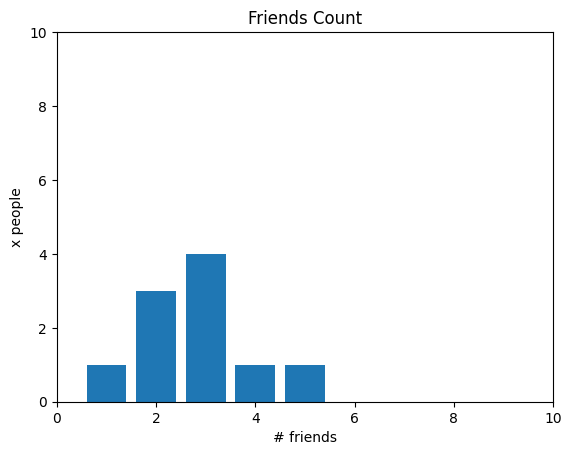

In [18]:
from collections import Counter
from matplotlib import pyplot as plt

# How many people have how many friends. Example: 1 person has 3 friends, 2 persons have 5 friends, 0 persons have 100 friends, etc
num_friends = {}
for user in users:
    if not len(user['friends']) in num_friends:
        num_friends[len(user['friends'])] = 1
    else:
        num_friends[len(user['friends'])] = num_friends[len(user['friends'])] + 1

# the dictionary format is num_friends : num_people
num_friends = {k: v for k, v in sorted(num_friends.items(), key=lambda x: x[1], reverse=False)}
# print(num_friends)

friends_count = Counter(num_friends)

xs = range(10) # the largest x value is 100
ys = [friends_count[x] for x in xs] # the y axis is the number of friends
plt.bar(xs, ys)
plt.axis([0, 10, 0, 10])
plt.title('Friends Count')
plt.xlabel('# friends')
plt.ylabel('x people')
plt.show()

### Central Tendencies, mean()

In [19]:
from __future__ import division
def mean(x):
    return sum(x) / len(x)

print('\n Mean number of friends: {}'.format(mean(num_friends)))


 Mean number of friends: 3.0


### median()

The mathematical formula for Median is: Median = {(n + 1) / 2}th value, where n is the number of values in a set of data. In order to calculate the median, the data must first be sorted in ascending order. The median is the number in the middle.

If the number of data values is odd, it returns the exact middle value. If the number of data values is even, it returns the average of the two middle values.

In [20]:
def median(v):
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    print('len(v) {}, midpoint {}'.format(n, midpoint))
    if n%2 == 1:
        return sorted_v[midpoint]
    else:
        lo = midpoint = -1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi])/2

print("\n Number of friends median: {}".format(median(num_friends)))
    

len(v) 5, midpoint 2

 Number of friends median: 3


### Quantile

Quantiles are a type of percentile. A percentile is a value with a certain percentage of the data falling below it. In general terms, k% of the data falls below the kth percentile.

In [21]:
def quantile(x, p):
    p_index = int(p * len(x))
    return sorted(x)[p_index]

print(quantile(num_friends, 0.25), quantile(num_friends, 0.50), quantile(num_friends, 0.75))
print(quantile(num_friends, 0.10), quantile(num_friends, 0.60), quantile(num_friends, 0.90))

2 3 4
1 4 5


### Mode

The mode is the value that appears most frequently in a data set. A set of data may have one mode, more than one mode, or no mode at all.

In [22]:
def mode(x):
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

print(mode(num_friends))
    

[3]


### Dispersion

In statistics, measures of dispersion quantify the spread or variability of a dataset. 

Range shows how much greater the highest value a data set. 

Variance computes the mean square deviation of all observations; standard deviation is the square root of variance. They are widely used because they can be sensitive towards outliers and also present a very simple interpretation. 

In [23]:
# the name "range" is already taken in Python
def data_range(x):
    return max(x) - min(x)

print('Dataset range: {}'.format(data_range(num_friends)))

# Try it with some random data

import random
 
rand_list=[]
n=100
for i in range(n):
    rand_list.append(random.randint(-1500,1500))
print(rand_list)
print('Dataset range: {}'.format(data_range(rand_list)))


Dataset range: 4
[973, 492, 23, 569, -355, -418, 1410, 1008, 1384, -719, -232, -1413, 222, 1002, 753, 69, 535, 1471, -393, 25, 410, 1386, -187, 495, 602, 1378, -1124, -1239, -823, 882, -594, -1128, -512, 990, 650, -690, 573, 921, -732, -1342, 1218, 560, 251, 237, -431, -312, 1015, -202, 240, -802, 1466, -267, 1107, 163, 934, 450, 499, 1152, 809, 294, -503, -211, 1388, -409, -1223, 897, 56, 123, 1345, 123, -1454, -1255, -1126, 630, 536, -72, -113, -1348, -514, 27, -760, -1018, 502, 1315, -615, 21, -1017, -321, 997, 532, 1261, -959, 159, -863, -166, -657, -471, -1482, -1025, -408]
Dataset range: 2953


### Variance

In [24]:
def sum_of_squares(n):
    sq = 0
    for i in n:
        sq = sq + (i * i)
 
    return sq
    
def de_mean(x):
    """ Translates x by substracting its mean, so the result has 0 mean """
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

print('Variance num_friends: {}'.format(variance(num_friends)))

Variance num_friends: 2.5


### Standard Deviation

In [ ]:
def standard_deviation(x):
    return math.sqrt(variance(x))

print('Standard Deviation num_friends: {}'.format(standard_deviation(num_friends)))